# Day 09. Exercise 03
# Ensembles

## 0. Imports

In [160]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test` and then get `X_train`, `y_train`, `X_valid`, `y_valid` from the previous `X_train`, `y_train`. Use the additional parameter `stratify`.

In [161]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [162]:
X = df.drop(columns='dayofweek')
y = df['dayofweek']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [163]:
XX = X_train.copy()
yy = y_train.copy()

X_train, X_valid, y_train, y_valid = train_test_split(XX, yy, test_size=0.2, random_state=21, stratify=yy)

## 2. Individual classifiers

1. Train SVM, decision tree and random forest again with the best parameters that you got from the 01 exercise with `random_state=21` for all of them.
2. Evaluate `accuracy`, `precision`, and `recall` for them on the validation set.
3. The result of each cell of the section should look like this:

```
accuracy is 0.87778
precision is 0.88162
recall is 0.87778
```

In [164]:
svm = SVC(kernel='rbf', C=10, gamma='auto', random_state=21, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.87870
precision is 0.88001
recall is 0.87870


In [165]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=21, class_weight='balanced', random_state=21)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.86982
precision is 0.87311
recall is 0.86982


In [166]:
forest = RandomForestClassifier(n_estimators=100, max_depth=24, criterion='entropy', class_weight='balanced', random_state=21)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
y_score = forest.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.91716
precision is 0.91926
recall is 0.91716


## 3. Voting classifiers

1. Using `VotingClassifier` and the three models that you have just trained, calculate the `accuracy`, `precision`, and `recall` on the validation set.
2. Play with the other parameteres.
3. Calculate the `accuracy`, `precision` and `recall` on the test set for the model with the best weights in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).

In [167]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', tree), ('forest', forest)], voting='hard', verbose=True)

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

[Voting] ...................... (1 of 3) Processing svm, total=   0.5s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.3s


In [168]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.90828
precision is 0.90979
recall is 0.90828


In [169]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', tree), ('forest', forest)], voting='soft', verbose=True)

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

[Voting] ...................... (1 of 3) Processing svm, total=   0.4s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.2s


In [170]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.89349
precision is 0.89674
recall is 0.89349


In [171]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', tree), ('forest', forest)], voting='hard', verbose=True, weights=[1, 2, 3])

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

[Voting] ...................... (1 of 3) Processing svm, total=   0.4s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.2s


In [172]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.91716
precision is 0.91947
recall is 0.91716


## 4. Bagging classifiers

1. Using `BaggingClassifier` and `SVM` with the best parameters create an ensemble, try different values of the `n_estimators`, use `random_state=21`.
2. Play with the other parameters.
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision)

In [173]:
bc = BaggingClassifier(estimator=svm, n_estimators=100, random_state=21, n_jobs=-1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

In [174]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.88462
precision is 0.88917
recall is 0.88462


In [175]:
bc = BaggingClassifier(estimator=svm, random_state=21)
params = {
    'n_estimators': [10, 30, 60, 90],
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

grid_search = GridSearchCV(estimator=bc, param_grid=params, scoring='accuracy', n_jobs=-1)

In [176]:
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

print(f"Best params is {grid_search.best_params_}")

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

Best params is {'bootstrap': False, 'n_estimators': 30, 'warm_start': True}
accuracy is 0.88757
precision is 0.88906
recall is 0.88757


## 5. Stacking classifiers

1. To achieve reproducibility in this case you will have to create an object of cross-validation generator: `StratifiedKFold(n_splits=n, shuffle=True, random_state=21)`, where `n` you will try to optimize (the details are below).
2. Using `StackingClassifier` and the three models that you have recently trained, calculate the `accuracy`, `precision` and `recall` on the validation set, try different values of `n_splits` `[2, 3, 4, 5, 6, 7]` in the cross-validation generator and parameter `passthrough` in the classifier itself,
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision). Use `final_estimator=LogisticRegression(solver='liblinear')`.

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

results = []

for n in range(2, 8):
    for passthrough in [True, False]:
        skf = StratifiedKFold(n_splits=n, random_state=21, shuffle=True)
        stack = StackingClassifier(estimators=[('svm', svm), ('tree', tree), ('forest', forest)], final_estimator=LogisticRegression(solver='liblinear'), cv=skf)
        
        stack.fit(X_train, y_train)
        y_pred = stack.predict(X_valid)
        
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, average='weighted')
        recall = recall_score(y_valid, y_pred, average='weighted')
        
        results.append({
            'n_splits': n,
            'passthrough': passthrough,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        })

In [178]:
results_df = pd.DataFrame(results)

# Выбираем лучшую комбинацию по точности (accuracy), затем по precision
results_df = results_df.sort_values(['accuracy', 'precision'], ascending=[False, False])
best_params = results_df.iloc[0]
best_params

n_splits              4
passthrough        True
accuracy       0.911111
precision      0.914486
recall         0.911111
Name: 4, dtype: object

In [179]:
skf = StratifiedKFold(n_splits=best_params['n_splits'], random_state=21, shuffle=True)
final_model = StackingClassifier(
    estimators=[('svm', svm), ('tree', tree), ('forest', forest)],
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=skf,
    passthrough=best_params['passthrough']
)

final_model.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))
y_pred = final_model.predict(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.92899
precision is 0.93138
recall is 0.92899


## 6. Predictions

1. Choose the best model in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).
2. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which labname and for which users.
3. Save the model.

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.98      0.89      0.93        55
           2       0.93      0.93      0.93        30
           3       0.92      0.96      0.94        80
           4       1.00      0.95      0.98        21
           5       0.86      0.94      0.90        54
           6       0.93      0.94      0.94        71

    accuracy                           0.93       338
   macro avg       0.94      0.92      0.93       338
weighted avg       0.93      0.93      0.93       338



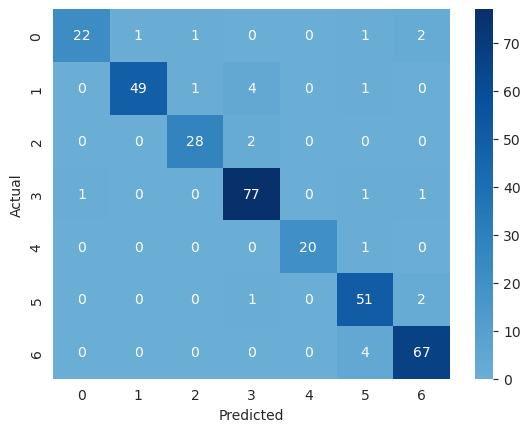

In [180]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', center=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

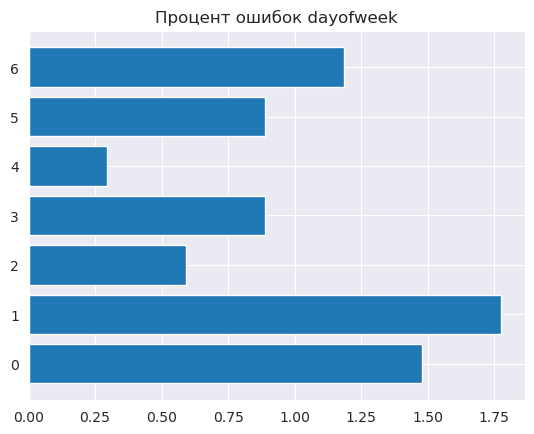

In [216]:
dayofweek = df = pd.merge(X_test, y_test, left_index=True, right_index=True)
dayofweek['prediction'] = y_pred
dayofweek['is_correct'] = (dayofweek.prediction == dayofweek.dayofweek).astype(int)
dayofweek = dayofweek[['dayofweek', 'is_correct']]
group = dayofweek.groupby(['dayofweek', 'is_correct']).size().unstack()


count = dayofweek.shape[0]
errors = group[0].apply(lambda x: x / count * 100 )

plt.barh(errors.index, errors)
plt.title("Процент ошибок dayofweek")
plt.show()

In [181]:
df = pd.merge(X_test, y_test, left_index=True, right_index=True)
df['prediction'] = y_pred
df.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek,prediction
1087,67,17,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
16,1,13,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,5,5
563,14,10,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,6,6
1381,20,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,3
1199,9,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2


In [182]:
def show_most_errors(name):
    columns_to_select = df.columns.str.contains(name)
    selected_columns = df.columns[columns_to_select]
    df['is_correct'] = df['prediction'] == df['dayofweek']
    
    name_df = pd.merge(df[selected_columns], df[['is_correct']], left_index=True, right_index=True)
    
    grouped = name_df.groupby('is_correct').sum()
    
    count = name_df.shape[0]
    
    # grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=0).fillna(0)
    grouped = grouped.apply(lambda x: x / count * 100).fillna(0)
    grouped = grouped[grouped.index == False]

    
    plt.figure(figsize=(10,8))
    plt.title(f"Процент ошибок по {name}")
    plt.barh(grouped.columns, grouped.values.ravel(), color='blue')
    plt.xlabel('Errors %')
    
    plt.show()

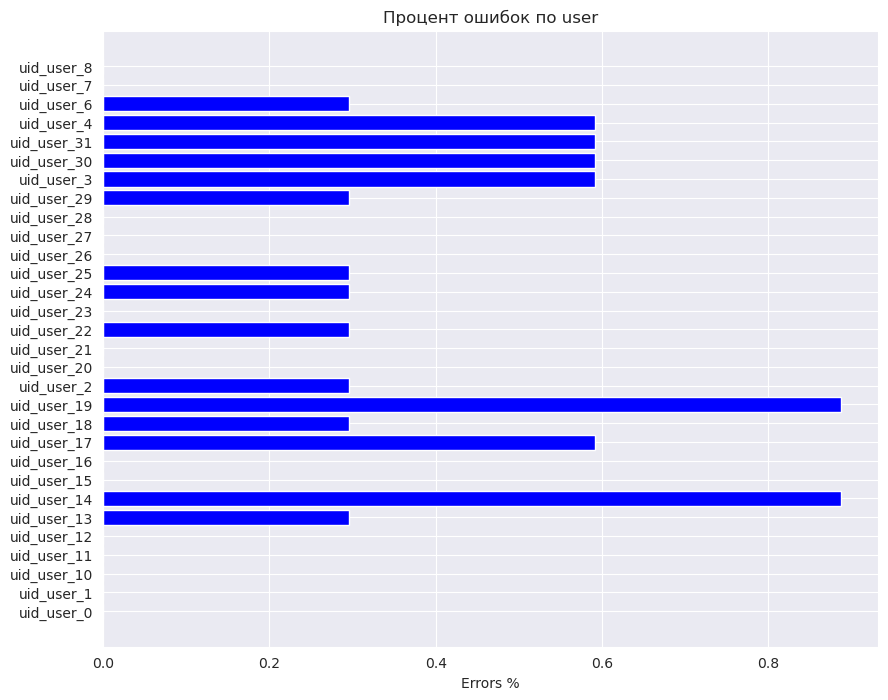

In [183]:
show_most_errors('user')

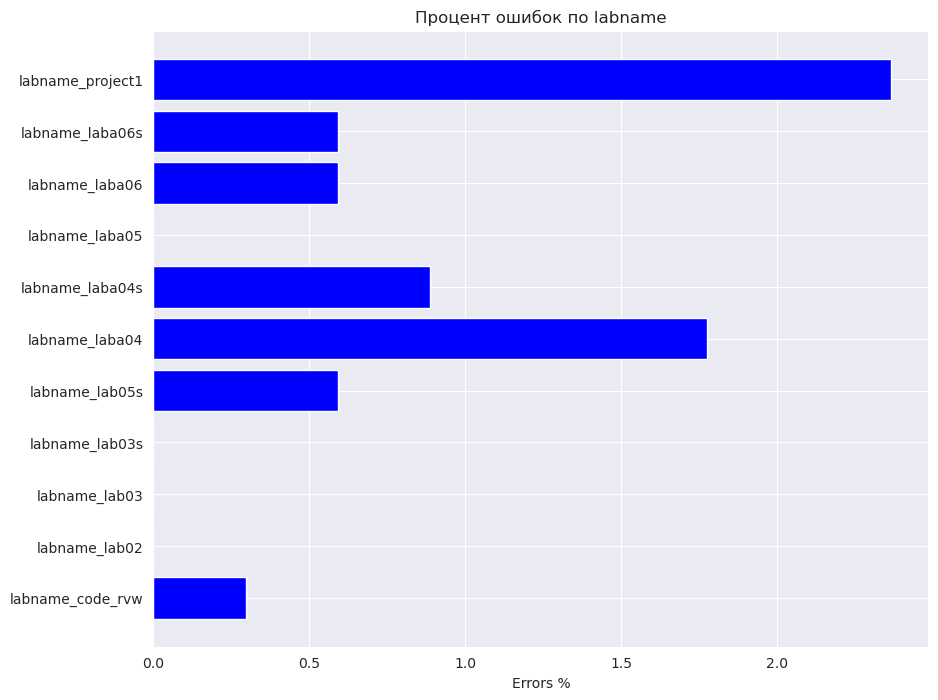

In [184]:
show_most_errors('labname')